# In this notebook:

1. Simple **Counting Tokens**
2. Visualising **Frequency Distributions** (but first, **cleaning up the data**)
3. Advanced visualisation: **Wordclouds**

# 1. Counting Tokens

#### Questions & Objectives:

- How can I count tokens in text?

#### Key Points

- To count tokens, one can make use of NLTK’s FreqDist class from the probability package. The N() method can then be used to count how many tokens a text or corpus contains.
- Counts for a specific token can be obtained using fdist["token"].

## 

1. read the file
2. lower_case()
3. FreqDist()
4. fdist.most_common()
5. fdist.freq()
6. plot
7.remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)
       

In [2]:
# run this cell now. It's the usual imports of text mining libraries

import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#let's load the India corpus and lowercase it. this will take a minute to run

from nltk.corpus import PlaintextCorpusReader
corpus_root = "./data/Medical_History_of_British_India"
corpus_reader = PlaintextCorpusReader(corpus_root, '.*', encoding='latin1') 
corpus_tokens = corpus_reader.words()
print("loaded tokens:", len(corpus_tokens) )

corpus_tokens = [word.lower() for word in corpus_tokens] 
print("finished lowercasing")

loaded tokens: 28345943
finished lowercasing


In [5]:
print(corpus_tokens[0:100])

['no', '.', '1111', '(', 'sanitary', '),', 'dated', 'ootacamund', ',', 'the', '6th', 'october', '1876', '.', 'from', '-', 'the', 'honourable', 'w', '.', 'hudleston', ',', 'chief', 'secretary', 'to', 'the', 'govern', '-', 'ment', 'of', 'madras', '.', 'to', '-', 'the', 'offg', '.', 'secretary', 'to', 'the', 'government', 'of', 'india', '.', 'resolution', 'of', 'government', 'of', 'india', 'no', '.', '1', '-', '137', ',', 'dated', '5th', 'march', '1875', '.', 'letter', 'from', 'government', 'of', 'india', 'no', '.', '486', ',', 'dated', '5th', 'september', '1876', '.', 'letter', 'to', 'government', 'of', 'india', 'no', '.', '1063', ',', 'dated', '26th', 'ditto', '.', 'referring', 'to', 'the', 'papers', 'marginally', 'noted', ',', 'i', 'am', 'directed', 'to', 'forward', 'copies']


## Counting tokens in text

You can also do other useful things like count the number of tokens in a text, determine the number and percentage   
count of particular tokens and plot the count distributions as a graph. To do this we have to import the FreqDist class from the NLTK probability package.   
When calling this class, a list of tokens from a text or corpus needs to be specified as a parameter in brackets.

In [8]:
# thiw will take a minute too
from nltk.probability import FreqDist
fdist = FreqDist(corpus_tokens)
print(fdist)

<FreqDist with 180893 samples and 28345943 outcomes>


You can print the counts of most common tokens with `freq_dist_object.most_common( how_many )`

eg. `fdist.most_common(100)` for the most common 100 words

The results will be arranged from top most frequent tokens, with and their frequency count.

In [9]:
print(fdist.most_common(100))

# fun fact: notice that this is a list of tupples [('word1',233), ('word2', 2324), ...]

[('.', 2472231), ('...', 1634912), (',', 1340864), ('the', 1193271), ('of', 784526), ('..', 549026), ('1', 536219), ('and', 442524), ('in', 417258), ('-', 369299), ('to', 340151), ('2', 294745), ('a', 245100), ('0', 228130), ('3', 220906), ('4', 179501), ('is', 157739), ('5', 153171), ('6', 142202), ('for', 141043), ('8', 115088), ('on', 115080), ('7', 113699), ('(', 112305), ('by', 111002), ('that', 109368), ('be', 108858), ('was', 107039), ('as', 105445), ('from', 103147), ('9', 99468), ('it', 94182), ('total', 94009), ('10', 91857), ('with', 89422), ('year', 82829), ('at', 82410), (')', 81355), ('were', 80461), ('i', 78835), ('no', 76388), ('11', 74753), ('this', 73792), ('are', 71826), ('or', 69733), ('which', 66949), ('12', 66645), (';', 66028), ('not', 65382), ('number', 63358), ('13', 57350), ('15', 55528), ('14', 55430), ('have', 53978), ('been', 53866), ('during', 51209), ('rs', 49600), ('.,', 46864), ('c', 44069), ('has', 43862), ('"', 43796), ('20', 43549), ('16', 42999), ('

In [10]:
# instead of printing, you can just return the value from the cell,
# it will be easier to read, but very long:
fdist.most_common(100)

[('.', 2472231),
 ('...', 1634912),
 (',', 1340864),
 ('the', 1193271),
 ('of', 784526),
 ('..', 549026),
 ('1', 536219),
 ('and', 442524),
 ('in', 417258),
 ('-', 369299),
 ('to', 340151),
 ('2', 294745),
 ('a', 245100),
 ('0', 228130),
 ('3', 220906),
 ('4', 179501),
 ('is', 157739),
 ('5', 153171),
 ('6', 142202),
 ('for', 141043),
 ('8', 115088),
 ('on', 115080),
 ('7', 113699),
 ('(', 112305),
 ('by', 111002),
 ('that', 109368),
 ('be', 108858),
 ('was', 107039),
 ('as', 105445),
 ('from', 103147),
 ('9', 99468),
 ('it', 94182),
 ('total', 94009),
 ('10', 91857),
 ('with', 89422),
 ('year', 82829),
 ('at', 82410),
 (')', 81355),
 ('were', 80461),
 ('i', 78835),
 ('no', 76388),
 ('11', 74753),
 ('this', 73792),
 ('are', 71826),
 ('or', 69733),
 ('which', 66949),
 ('12', 66645),
 (';', 66028),
 ('not', 65382),
 ('number', 63358),
 ('13', 57350),
 ('15', 55528),
 ('14', 55430),
 ('have', 53978),
 ('been', 53866),
 ('during', 51209),
 ('rs', 49600),
 ('.,', 46864),
 ('c', 44069),
 ('h

with `frequency_distribution.N()` we can count the total number of tokens in a corpus.

eg. `fdist.N()`

In [20]:
# N == The total number of tokens in a corpus.

print("Total number of tokens in a corpus: " + str(fdist.N()))

Total number of tokens in a corpus: 28345943


With `fdist[ your_word ]` you can count the number of times a token appears in a corpus:

eg. `fdist['hospital']` returns `28280`

In [21]:
# This is a list of tuples [('word1',222),('word2',223)]

print(fdist['hospital'])
print(fdist['he'])
print(fdist['she'])

28280
22830
1561


With `fdist.freq( your_word )` you can also determine the relative frequency of a token in a corpus, so what % of the corpus a term is:

eg. `fdist.freq('hospital')` returns `0.000997673635341749` which means that `0.1% or all words are 'hospital'`


In [32]:
print(fdist.freq('hospital') * 100)
print(fdist.freq('he')* 100)
print(fdist.freq('she')* 100) # So small that it goes into 'scientific notation e-05'

0.0997673635341749
0.08054062621942053
0.005506960907950743


#### Note on counting tokens that match a Regular Expression

If you have a list of tokens created using regular expression matching as in the previous section and you’d like to count them then you can also simply count the length of the list:

In [11]:
# this will take a minute
import re

womaen_strings = [word 
                  for word in corpus_tokens 
                  if re.search('^wom[ae]n$', word)]

print(len(womaen_strings))

5051


Frequency counts of tokens are useful to compare different corpora in terms of occurrences of different words or expressions,   
for example in order to see if a word appears a lot rarer in one corpus versus another.  
Counts of tokens, documents and a entire corpus can also be used to compute simple pairwise document similarity of two documents  
(later, have a look at e.g. see Jana Vembunarayanan’s blogpost for a hands-on example of how to do that https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/).

# 2. Visualising Frequency Distributions
# (but first, cleaning up the data)


#### Questions & Objectives:

- How can I draw a frequency distribution of the most frequent words in a collection?
- How can I visualise this data as a word cloud.

#### Key Points

- A frequency distribution can be created using the plot() method.
- In this episode you have also learned how to clean data by removing stopwords and other types of tokens from the text.
- A word cloud can be used to visualise tokens in text and their frequency in a different way.

## Visualising Frequency distributions of tokens in text

### Graph of the frequency of the words as they are:

The plot() method can be called to draw the frequency distribution as a graph for the most common tokens in the text.

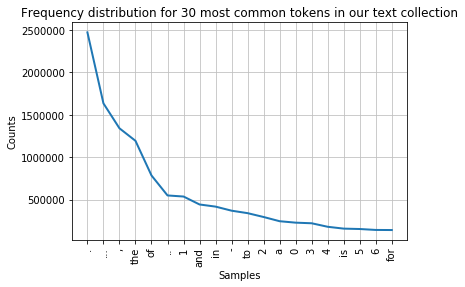

In [35]:
# Xlabel, Ylabel ?
fdist.plot(20, title='Frequency distribution for 30 most common tokens in our text collection')

You can see that the distribution contains a lot of non-content words like “the”, “of”, “and” etc. (we call these stop words) and punctuation. This is not very useful. Let's have a small peek on what these words are:

In [32]:
fdist.most_common(100)

[('.', 2472231),
 ('...', 1634912),
 (',', 1340864),
 ('the', 1193271),
 ('of', 784526),
 ('..', 549026),
 ('1', 536219),
 ('and', 442524),
 ('in', 417258),
 ('-', 369299),
 ('to', 340151),
 ('2', 294745),
 ('a', 245100),
 ('0', 228130),
 ('3', 220906),
 ('4', 179501),
 ('is', 157739),
 ('5', 153171),
 ('6', 142202),
 ('for', 141043),
 ('8', 115088),
 ('on', 115080),
 ('7', 113699),
 ('(', 112305),
 ('by', 111002),
 ('that', 109368),
 ('be', 108858),
 ('was', 107039),
 ('as', 105445),
 ('from', 103147),
 ('9', 99468),
 ('it', 94182),
 ('total', 94009),
 ('10', 91857),
 ('with', 89422),
 ('year', 82829),
 ('at', 82410),
 (')', 81355),
 ('were', 80461),
 ('i', 78835),
 ('no', 76388),
 ('11', 74753),
 ('this', 73792),
 ('are', 71826),
 ('or', 69733),
 ('which', 66949),
 ('12', 66645),
 (';', 66028),
 ('not', 65382),
 ('number', 63358),
 ('13', 57350),
 ('15', 55528),
 ('14', 55430),
 ('have', 53978),
 ('been', 53866),
 ('during', 51209),
 ('rs', 49600),
 ('.,', 46864),
 ('c', 44069),
 ('h

Yes, definitely not useful. Many of these words look like noise.

### 🐛Minitask:  Identify 3-4 categories of not-very-helpful tokens in the above set

Look at the above set of most popular tokens. Many of them look important and meaningful 'government', 'disease' etc but many of them are not very useful.

- identify some families of not helpful tokens and write names for these families below:

Do not spend too much time on this (max 2 minutes)

## here you can write yoru answer
- Punctuation, number, connect words.

#### Removing tokens that are just noise:

We can remove them before drawing the graph. We need to import stopwords from the corpus package to do this.  
The list of stop words is combined with a list of punctuation and a list of single digits using + signs into a new list of items to be ignored.

Here are some of python's build in 'cheat sheets' of punctuations and other 'meaningless charaters', and some provided by the nltk library:

In [42]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#let's have a look what are the words usually discarded:

print(string.punctuation)
print('-------------'*10)
print(string.digits)
print('-------------'*10)
print(stopwords.words('english'))
print('-------------'*10)

# note: we turn string to a list, so they can be added to the other list. But 
print(list(string.punctuation))
print(list(string.digits))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
----------------------------------------------------------------------------------------------------------------------------------
0123456789
----------------------------------------------------------------------------------------------------------------------------------
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'ab

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('...', 1634912), ('..', 549026), ('total', 94009), ('10', 91857), ('year', 82829), ('11', 74753), ('12', 66645), ('number', 63358), ('13', 57350), ('15', 55528), ('14', 55430), ('rs', 49600), ('.,', 46864), ('c', 44069), ('20', 43549), ('16', 42999), ('cases', 39876), ('......', 39757), ('per', 39060), ('17', 39039), ('p', 38460), ('18', 38289), ('one', 38085), ('19', 34810), ('25', 32234), ('21', 32172), ('district', 30466), ('22', 30456), ('may', 30151), ('24', 29987)]


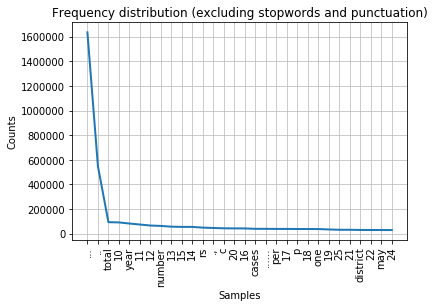

In [43]:
# remove stopwords, punctuation and digits. the set( ... ) syntax removes duplicates

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text = [word 
                 for word in corpus_tokens 
                 if not word in remove_these] 

fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

# this graph should be a bit better

### Manually adding more words to be ignored

Above is already much better, but sometimes we want to manually add some words to be ignored. It is easy, we just need to add more elements to `remove_these` List.

We looked at the top 100 words and found these to be not particularly useful:

In [38]:
print( [word for (word,count) in fdist_filtered.most_common(100)])

['...', '..', 'total', '10', 'year', '11', '12', 'number', '13', '15', '14', 'rs', '.,', 'c', '20', '16', 'cases', '......', 'per', '17', 'p', '18', 'one', '19', '25', '21', 'district', '22', 'may', '24', '30', 'report', '23', 'hospital', 'government', 'veterinary', 'disease', '26', '28', 'average', 'two', '27', 'years', 'vaccination', '40', 'plague', '50', 'b', '29', '33', '31', 'table', 'males', 'females', 'f', '35', 'statement', '32', 'also', 'work', 'medical', 'case', 'general', 'deaths', '36', '34', 'animals', 'cent', '37', '38', 'would', 'bombay', '39', '100', 'ganja', ').', 'department', 'made', '41', '000', '45', 'india', 'died', '60', 'found', '42', 'showing', 'small', 'time', 'previous', '43', '00', '99', 'use', 'patients', '44', '46', 'first', 'treated', 'co']


There seems to be some elements here that are not meaningful for our analysi:

- rogue (villein) punctuation '...', '..', etc
- a lot of two-digit numbers '12'
- individual letters 'a', 'j' [a-z]
- some other not very meaningful words 'also','would'

Let's create more lists of things we want to remove:

In [48]:
# I create a range of numbers from 0 to 100 and turn them into strings, so they are like '45' not like 45

numbers_1_to_100 = [str(integer) for integer in range(101)]
print(numbers_1_to_100)

# here are the weird puctuations
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,']
print(extra_punctuation_to_remove)

individual_letters = list(string.ascii_lowercase)
print(individual_letters)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
['.', '..', '...', '....', '.....', '......', ').', '.,']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### 🐛Minitask: Identiy more words that are potentially noise

In a minute we will remove tokens that are noise. Based on your previous minitask and the current most popular tokens:

- identify 10 more words that are most likely noise
- add them to the list `some_more_words_to_remove`, run the cell again and continue

In [64]:
# run this cell to see current 100 most popular tokens, as part of the task above 
# add some more words to some_more_words_to_remove
print( [word for (word,count) in fdist_filtered.most_common(100)])

some_more_words_to_remove = [ 'rs', 'per', 'would', '000', 'may','two','years','also','case','general','year','cases']



['total', 'year', 'number', 'cases', 'one', 'district', 'report', 'hospital', 'government', 'veterinary', 'disease', 'average', 'vaccination', 'plague', 'table', 'males', 'females', 'statement', 'work', 'medical', 'deaths', 'animals', 'cent', 'bombay', 'ganja', 'department', 'made', 'india', 'died', 'found', 'showing', 'small', 'time', 'previous', '00', 'use', 'patients', 'first', 'treated', 'co', 'diseases', 'water', 'cattle', 'three', 'civil', 'asylum', 'present', 'used', 'results', 'days', 'surgeon', 'admitted', 'native', 'march', 'persons', 'officer', 'local', 'madras', 'districts', 'ditto', 'vaccinated', 'well', 'cost', 'last', 'large', '1st', 'much', 'given', 'assistant', 'superintendent', 'population', 'bengal', 'strength', 'bhang', 'appears', 'ii', 'people', 'good', 'see', 'note', 'january', 'officers', 'male', 'mr', 'increase', 'female', 'successful', 'following', 'part', 'taken', 'fever', 'percentage', 'operations', 'blood', 'december', 'daily', 'period', 'months', 'due', 'an

#### Note about cleaning up data carefully
Sometimes you might find words that do not communicate the content, like 'would' and we are showing you how to remove them here.

But it comes with a warning: you have to be very careful persoming steps like these, because they have potential of completely biasing your data  
but also careful cleaning of messy datasets is very important.

Also: While it makes sense to remove stop words for this type of frequency analysis it essential to keep them in the data for other text analysis tasks.  
Retaining the original text is crucial, for example, when deriving part-of-speech tags of a text or for recognising names in a text.

Now we can re-do the visualisation again, this time using an expanded and customised list of items to ignore.
This should be a more meaningful graph!

[('total', 94009), ('number', 63358), ('cases', 39876), ('one', 38085), ('district', 30466), ('report', 29749), ('hospital', 28280), ('government', 26238), ('veterinary', 25730), ('disease', 25709), ('average', 25560), ('vaccination', 24252), ('plague', 23525), ('table', 21814), ('males', 21500), ('females', 21153), ('statement', 20795), ('work', 20459), ('medical', 20169), ('deaths', 19189), ('animals', 18691), ('cent', 18427), ('bombay', 17257), ('ganja', 17041), ('department', 16762), ('made', 16729), ('india', 16564), ('died', 16548), ('found', 16405), ('showing', 16112)]


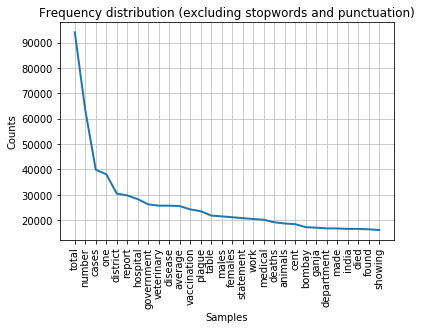

In [65]:
# lets combine it all together and generate our new graph

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)

filtered_text = [word 
                 for word in corpus_tokens 
                 if not word in remove_these]
    
fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

# 3. Advanced visualisation: Wordclouds

## Basic wordcloud:

We can also present the filtered tokens as a word cloud. It's a modern type of graph where sizes of words communicate their frequency,  
often used fo have a quick an overview of the corpus. Additionally these wordclouds can be shaped or customised as we'll see below.

We will use the `WordCloud( ).generate_from_frequencies()` method.  
The input to this method is a frequency dictionary of all tokens and their counts in the text.

You will also see another way to create a simplified frequency count of words.  
That's because wordcloud requires words to be in a dictionary format:

 `{'total': 94009, 'year': 82829, 'number': 63358, 'cases': 39876 .... }`
 
We will use another python package `Counter` to create such dictionary using the `filtered_text` variable as input.  
Note it is much less powerful than FreqDist, but you might see it in other people's code, so we want you to be familiar with it.

Once we have the data in the correct format, we generate the WordCloud using the frequency dictionary and plot the figure to size.  
We can show the plot using `plt.show()`.

In [66]:
from collections import Counter

simple_frequencies_dict = Counter(filtered_text)

# let's have a peek into this dictionary. How many times the word 'hospital' appears in filtered_text?
print(simple_frequencies_dict['hospital'])

28280


#### note on installing extra software on your virtual machine with !pip

But first we'll show you one of the most powerful features of of jupyter notebooks: you can downlload and install almost any software from the internet into your 'virtual machine'. Because it is 'sandboxed' it is primarilly safe. To install things we use `!pip` python package installer command

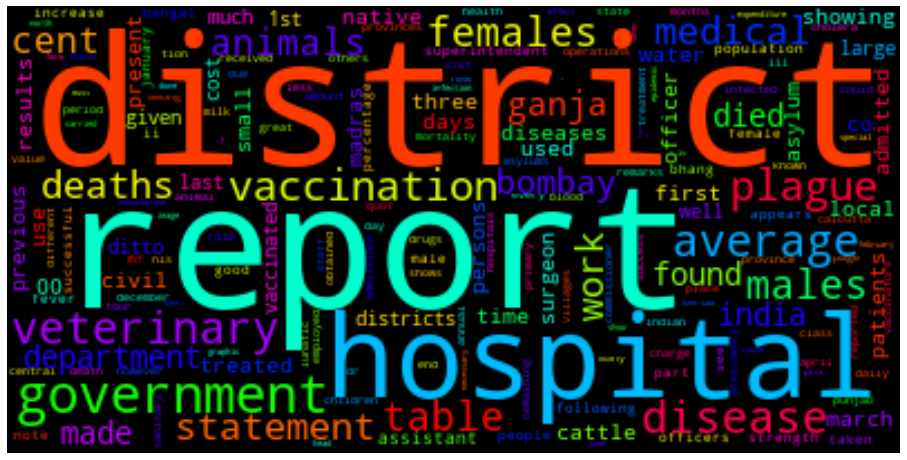

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# visualising and remove more words mannually.

some_more_words_to_remove = [ 'rs', 'per', 'would', '000', 'may','two','years','also','case','general','year','cases','one','total','number']

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)

filtered_text = [word 
                 for word in corpus_tokens 
                 if not word in remove_these]
simple_frequencies_dict = Counter(filtered_text)


cloud = WordCloud(max_font_size=80, colormap="hsv").generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# you should see a colourful diagram below. It is generate right on time for you. 
# go no, generate it again, you will see that it changes slightly

### 🖇💬Buddy discussion: What text data would wordclouds be really good and really bad at?

#### Ask your buddy now if they reached the **BUDDY TASK**. Once you both did, complete this task:

Try to identify strengths and weaknesses unique to the usage of wordclouds.

Don't spend too much time on this (max 2 mins) but take note of your favourite idea.

Strengths: quick visualising   
Weaknesses: ??

## Fancy-shaped word cloud:

And now a shaped word cloud for a bit of fun. This will present your workcloud in the shape of a given image.

You need a shape file which we provide for you in the form of the medical symbol  
(it looks like two snakes wrapped around a staff with wings).

The mask image needs to have a transparent background so that only the black shape is used as a mask for the word cloud -  
parts that are black will be filled with your words, parts that are transparent will be left empty. You can use your own images later!

It would be fun if we can customise:

- the shape in which the words arrange themselves (ex, circle, shape of UK, question mark)
- colours to use

The **geeky bits** about how we use images and colours **(feel free to skip reading them)**:

- To display the shaped word cloud you need to import the Image package form PIL as well as numpy.  
The image first needs to be opened and converted into a numpy array which we call med_mask. 
- A customised colour map (cmap) is created to present the words in black font. 
- Colours use #RRGGBB format where two hexadecimal characters (0123456789ABCDEF) describe amount of Red Green and Blue we want.  
eg. #FF0000 means full red.  
    #000000 means black.  
    #FFFFFF is white,  
    #111111 and #222222 are shades of grey
- Then the word cloud is created with a white background, the mask and the colour map set as parameters and  
 generated from the dictionary containing the number of occurrences for each word.

(-0.5, 337.5, 337.5, -0.5)

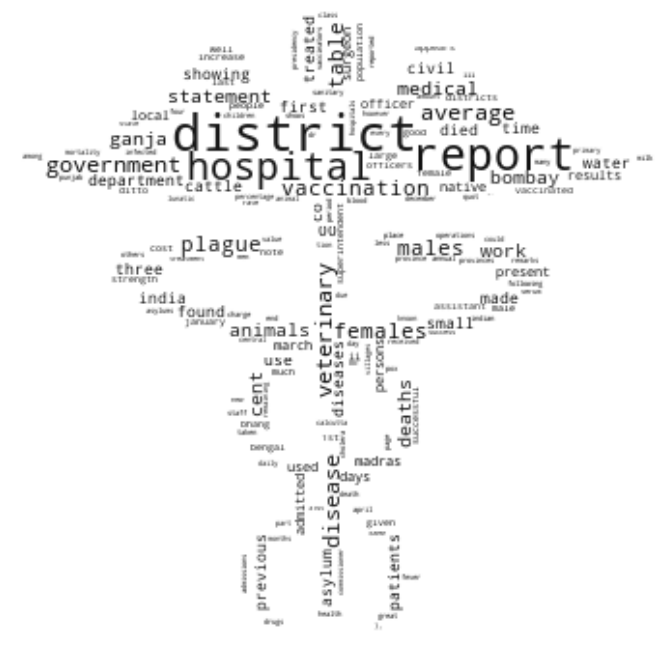

In [74]:
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# masking image
medical_icon_mask_image = np.array(Image.open("./image/medical.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# imcge details: background, shape-mask, colours 
wordcloud = WordCloud(background_color="white", mask=medical_icon_mask_image, colormap=cmap)

wordcloud.generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")



### 🦋 Extra task (optional): if you have finished everything else already:

- can you create a wordcloud of the presidential speeches corpus?
- then, can you use your own masking image?

In [75]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "./data/barack_obama_speeches"
corpus_reader = PlaintextCorpusReader(corpus_root, '.*', encoding='latin1') 
corpus_tokens = corpus_reader.words() 
print("loaded tokens:", len(corpus_tokens) )

corpus_tokens = [word.lower() for word in corpus_tokens] 
print("finished lowercasing")

loaded tokens: 12924
finished lowercasing


In [77]:
fdist = FreqDist(corpus_tokens)
print(fdist.most_common(100))

[(',', 555), ('.', 516), ('the', 512), ('and', 461), ('to', 334), ('of', 306), ('that', 264), ('we', 239), ('a', 214), ('our', 206), ("'", 173), ('i', 168), ('in', 148), ('is', 128), ('for', 123), ('-', 114), ('you', 103), ('this', 100), ('it', 95), ('are', 93), ('but', 81), ('s', 80), ('not', 79), ('us', 76), ('have', 76), ('will', 74), ('who', 70), ('can', 65), ('on', 64), (';', 59), ('they', 59), ('as', 58), ('with', 56), ('what', 54), ('america', 53), ('t', 48), ('so', 45), ('has', 45), ('all', 44), ('or', 44), ('from', 43), ('when', 43), ('up', 43), ('more', 42), ('by', 41), ('"', 40), ('one', 39), ('time', 39), ('my', 38), ('because', 37), ('people', 37), ('be', 37), ('new', 37), ('promise', 36), ('must', 36), ('those', 35), ('change', 33), ('their', 33), ('nation', 30), ('she', 30), ('american', 29), ('at', 29), ('me', 29), ('work', 29), ('been', 29), ('these', 29), ('about', 29), ('do', 29), ('your', 28), ('every', 28), ('than', 27), ('just', 27), ('an', 26), ('country', 26), (

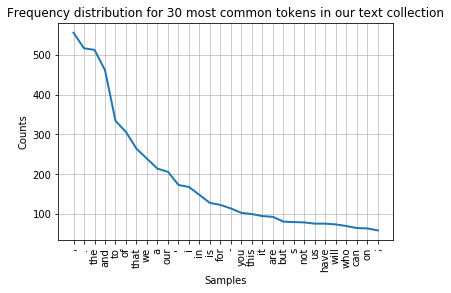

In [78]:
fdist.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')

[('us', 76), ('america', 53), ('time', 39), ('people', 37), ('new', 37), ('promise', 36), ('must', 36), ('change', 33), ('nation', 30), ('american', 29), ('work', 29), ('every', 28), ('country', 26), ('know', 25), ('go', 24), ('applause', 24), ('make', 23), ('cannot', 22), ('.)', 22), ('mccain', 21), ('together', 19), ('keep', 19), ('say', 19), ('need', 18), ('care', 18), ('let', 17), ('world', 17), ('men', 17), ('women', 17), ('government', 17)]


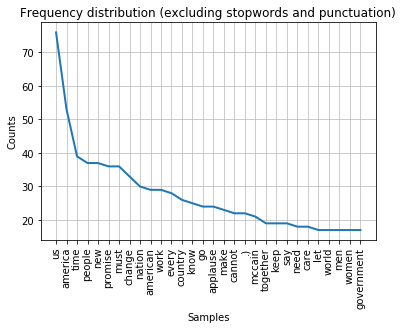

In [79]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)

filtered_text = [word 
                 for word in corpus_tokens 
                 if not word in remove_these]

fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

In [80]:
simple_frequencies_dict = Counter(filtered_text)

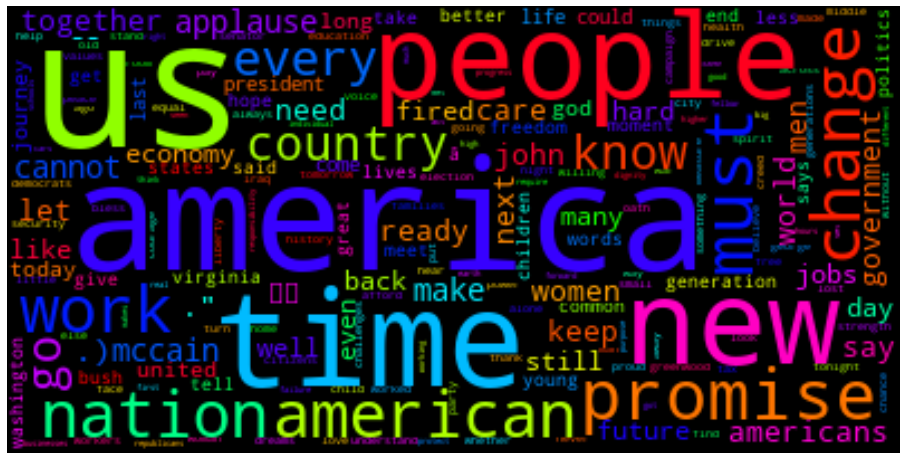

In [81]:
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


(-0.5, 1349.5, 1919.5, -0.5)

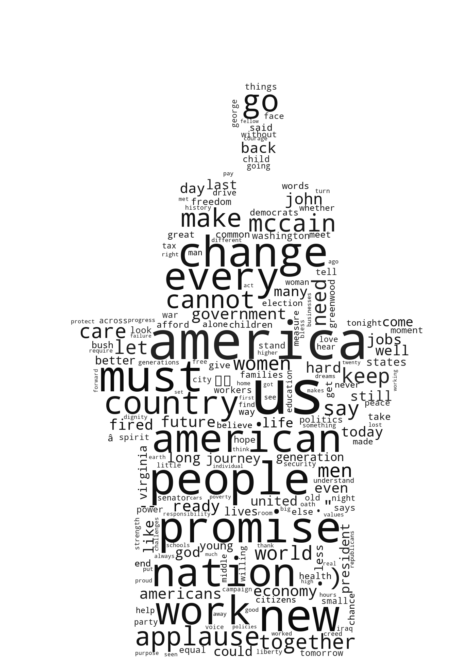

In [90]:
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

some_more_words_to_remove = [ 'rs', 'per', 'would', '000', 'may','two','years','also','case','general','year','cases','one','total','number','time','know','next']

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)

filtered_text = [word 
                 for word in corpus_tokens 
                 if not word in remove_these]
simple_frequencies_dict = Counter(filtered_text)

# speech image
speech_icon_mask_image = np.array(Image.open("./images/speech.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# image details: background, shape-mask, colours 
wordcloud = WordCloud(background_color="white", mask= speech_icon_mask_image, colormap=cmap)

wordcloud.generate_from_frequencies(simple_frequencies_dict)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")